In [1]:
"""
Evan Hodge 800986621 HW_4 ECGR_4105

P 1 
This first section was utilized to see kernel performance before PCA

"""

'\nEvan Hodge 800986621 HW_4 ECGR_4105\n\nP 1 \nfor num 2 SVR just use mse to compare accuracies\n\n'

In [2]:
#import warnings
#warnings.filterwarnings("ignore")
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, classification_report
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
#from sklearn.metrics import PrecisionRecallDisplay
#from sklearn.metrics import classification_report
from scipy import stats


In [3]:
dataset = load_breast_cancer()

X = dataset['data']
Y = dataset['target']

#print(X)
#print(Y)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#sc_X = StandardScaler()              
sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         
X = sc_X.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=0)

------------------------------------------------------------------------------
Kernel =  linear
SVC(C=100000.0, kernel='linear')
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

[[45  2]
 [ 3 64]]


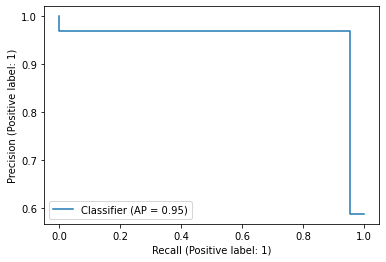

------------------------------------------------------------------------------
Kernel =  poly
SVC(C=100000.0, kernel='poly')
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.93      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[47  0]
 [ 5 62]]


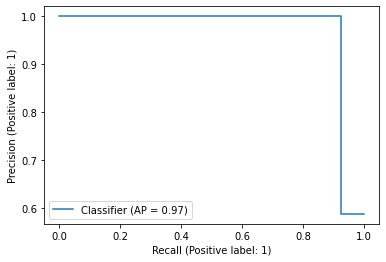

------------------------------------------------------------------------------
Kernel =  rbf
SVC(C=100000.0)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.96      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

[[47  0]
 [ 3 64]]


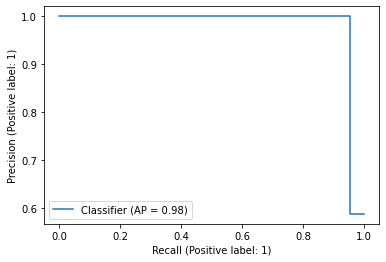

In [6]:
for kernel in ("linear", "poly", "rbf"):
    
    print("------------------------------------------------------------------------------")
    print("Kernel = ", kernel)
    
    model = SVC(kernel=kernel, C=1E5)
    
    model.fit(X_train, Y_train)
    print(model)
    
    expected = Y_test
    predicted = model.predict(X_test)
    
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    
    PrecisionRecallDisplay.from_predictions(expected, predicted)
    plt.show()

In [7]:
"""

P 1 

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). 
Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1) Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
2) Plot your classification accuracy, precision, and recall over a different number of Ks. 
3) Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

"""
import warnings
warnings.filterwarnings("ignore")
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, classification_report
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from scipy import stats

dataset = load_breast_cancer()

X = dataset['data']
Y = dataset['target']

from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#sc_X = StandardScaler()              
sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         

X = sc_X.fit_transform(X)

--------------------------------------------------------------
Kernel =  linear
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

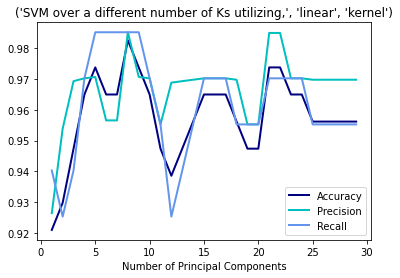

Highest accuracy of 0.9824561403508771 achieved at n = 8
--------------------------------------------------------------
Kernel =  poly
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

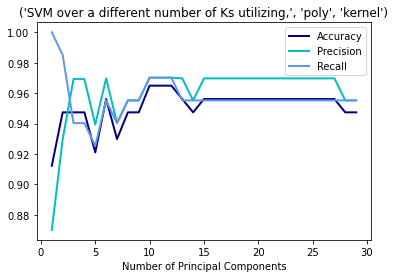

Highest accuracy of 0.9649122807017544 achieved at n = 10
--------------------------------------------------------------
Kernel =  rbf
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

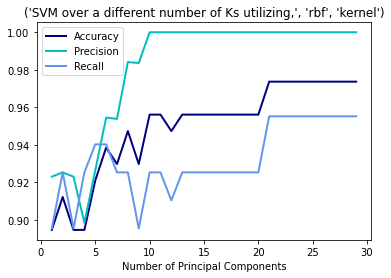

Highest accuracy of 0.9736842105263158 achieved at n = 21


In [8]:
from sklearn.decomposition import PCA 

num_iterations = 29

for kernel in ("linear", "poly", "rbf"):
    
    print("--------------------------------------------------------------")
    print("Kernel = ", kernel)

    hi_acc = 0.001
    iter_num = np.zeros(num_iterations)
    acc_arr = np.zeros(num_iterations) 
    prec_arr = np.zeros(num_iterations)
    rec_arr = np.zeros(num_iterations)
    
    
    for n in range(num_iterations):
        
        n=n+1      # to avoid a n=0, meaning zero principal components
        print(n, end = ' ')
        
        pca = PCA(n_components=n) 
        principalComponents = pca.fit_transform(X) 
        principalDf = pd.DataFrame(data = principalComponents )                 
        #finalDf = pd.concat([principalDf, pd.DataFrame(dataset['target'])], axis = 1)
    
        from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
        np.random.seed(0)
        X_train, X_test, Y_train, Y_test = train_test_split(principalDf,Y, test_size = 0.20, random_state=0)

        from sklearn.linear_model import LogisticRegression
        classifier = SVC(kernel=kernel, C=1E6)
        classifier.fit(X_train, Y_train)
        
        Y_pred = classifier.predict(X_test)

        from sklearn import metrics
        
        cur_acc = metrics.accuracy_score(Y_test, Y_pred)
        cur_prec= metrics.precision_score(Y_test, Y_pred)
        cur_rec = metrics.recall_score(Y_test, Y_pred)
        
        acc_arr[(n-1)] = cur_acc 
        prec_arr[(n-1)] = cur_prec
        rec_arr[(n-1)] = cur_rec
        iter_num[(n-1)]= n
        
        if cur_acc > hi_acc:
            hi_acc = cur_acc
            hi_n = n
    
    lw=2
    plt.plot(iter_num, acc_arr, color='navy', lw=lw, label='Accuracy')
    plt.plot(iter_num, prec_arr, color='c', lw=lw, label='Precision')
    plt.plot(iter_num, rec_arr, color='cornflowerblue', lw=lw, label='Recall')
    plt.xlabel('Number of Principal Components')
    plt.title(('SVM over a different number of Ks utilizing,', kernel, 'kernel'))
    plt.legend()
    plt.show()
    print( "Highest accuracy of", hi_acc, "achieved at n =", hi_n)

In [16]:
"""
Problem 2

Develop a SVR regression model that predicts housing price based on the following 
input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
hotwaterheating, airconditioning, parking, prefarea

1) Plot your regression model for SVR similar to the sample code provided on Canvas.
2) Compare your results against linear regression with regularization loss that you 
    already did in homework 1. 
3) Use the PCA feature extraction for your training. Perform N number of independent 
    training (N=1, …, K). Identify the optimum number of K, principal components that 
    achieve the highest regression accuracy. 
4) Explore different kernel tricks to capture non-linearities within your data. Plot 
    the results and compare the accuracies for different kernels.
"""

HS = pd.read_csv('Housing.csv')
HS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
HS = pd.DataFrame(HS)

In [18]:
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [19]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price'] # define binary attributes
bin_vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

HS_bin = HS[bin_vars]                                                  # Quantize yes and no
HS_bin = HS[bin_vars].apply(binary_map)

allvars = (bin_vars + num_vars)
HS_1b = pd.concat((HS_bin,HS[num_vars]), axis=1)
HS_1b.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,1,7420,4,2,3,2,13300000
1,1,0,0,0,1,0,8960,4,4,4,3,12250000
2,1,0,1,0,0,1,9960,3,2,2,2,12250000
3,1,0,1,0,1,1,7500,4,2,2,3,12215000
4,1,1,1,0,1,0,7420,4,1,2,2,11410000


In [50]:
X = HS_1b.loc[:, HS_1b.columns != 'price']
Y = HS_1b.iloc[:,-1:]

from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#sc_X = StandardScaler()              
sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         

X = pd.DataFrame(sc_X.fit_transform(X))
Y = pd.DataFrame(sc_X.fit_transform(Y))

#X.head()
Theta = Theta.transpose()

1 principal component(s) 

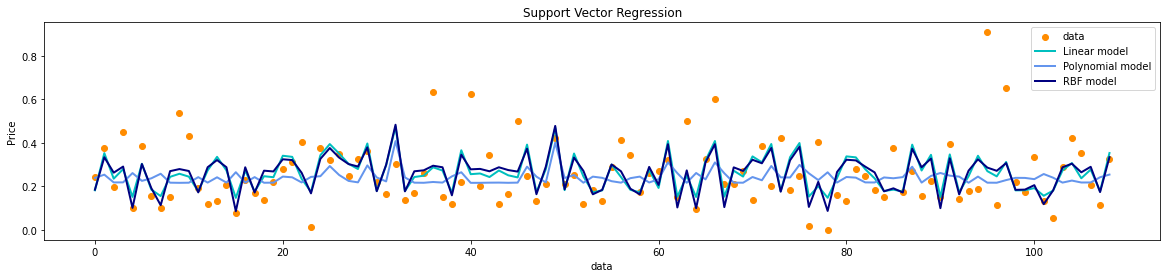

2 principal component(s) 

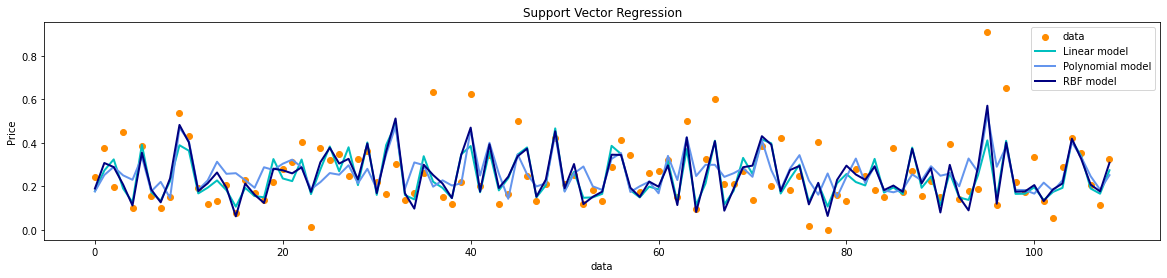

3 principal component(s) 

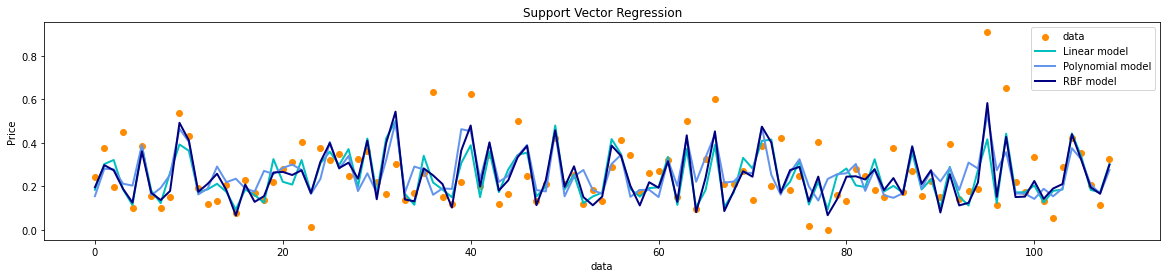

4 principal component(s) 

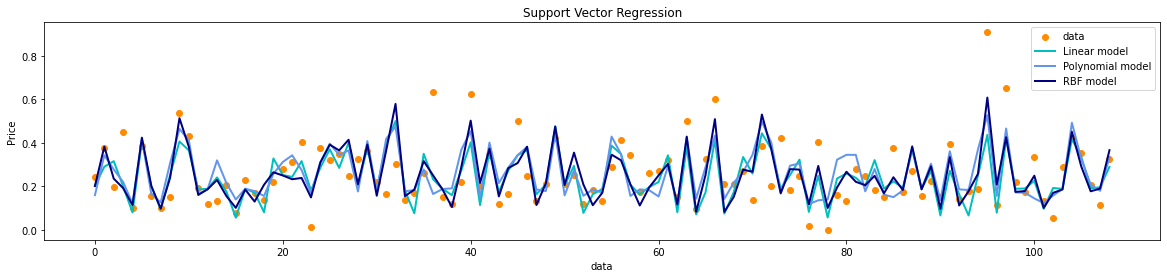

5 principal component(s) 

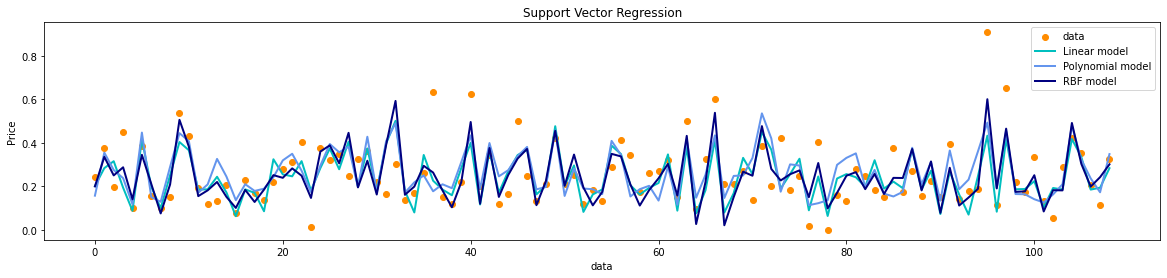

6 principal component(s) 

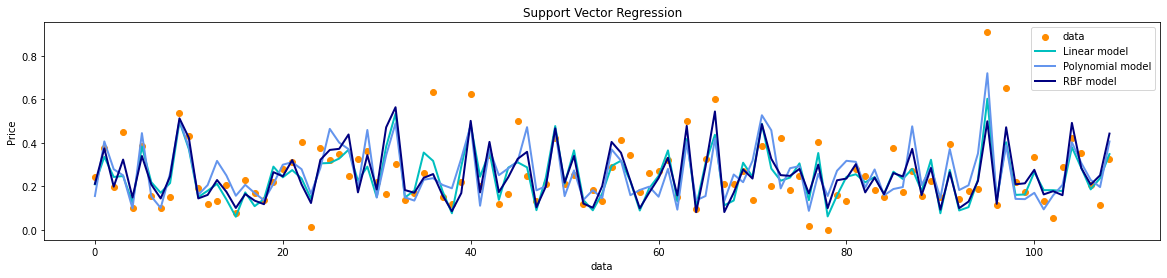

7 principal component(s) 

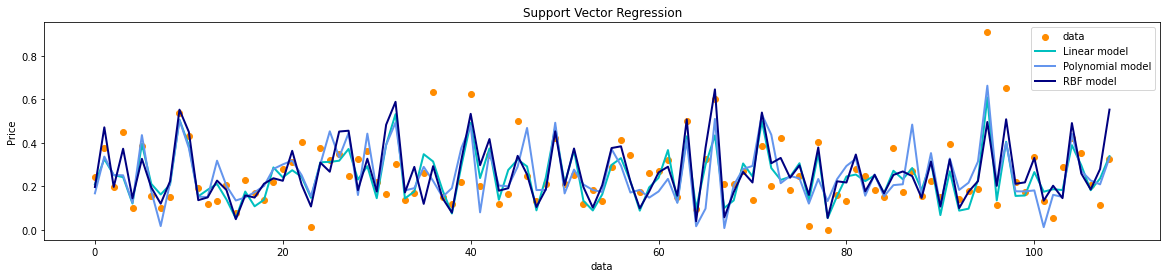

8 principal component(s) 

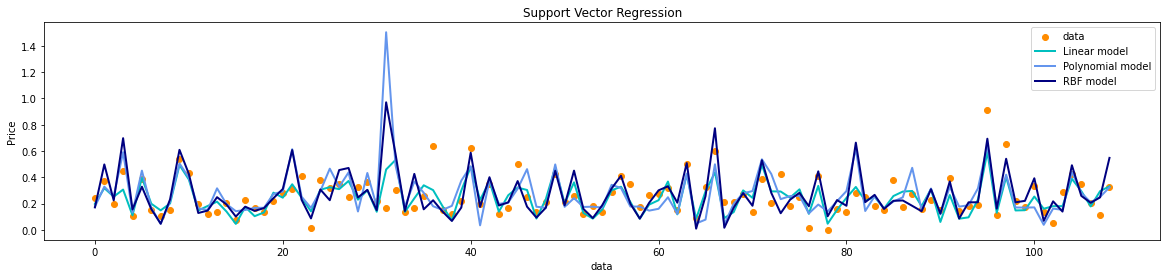

9 principal component(s) 

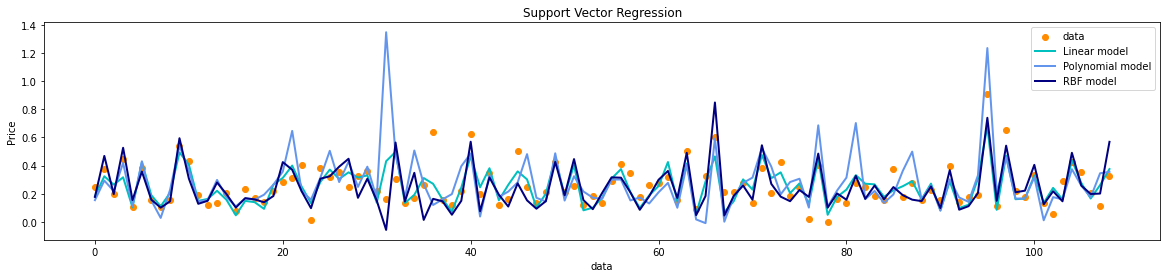

10 principal component(s) 

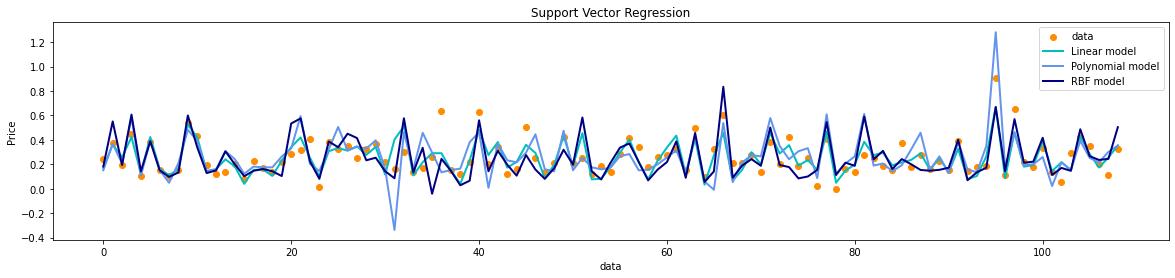

11 principal component(s) 

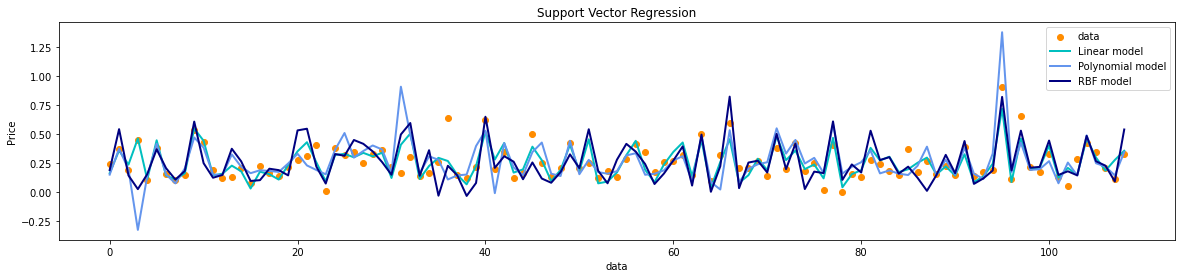

   RBF Kernel gave lowest Mean-Squared-Error of 0.00971257788171609 achieved at n = 5
Linear Kernel gave lowest Mean-Squared-Error of 0.0075574653442376065 achieved at n = 11
  Poly Kernel gave lowest Mean-Squared-Error of 0.012733380841783151 achieved at n = 6


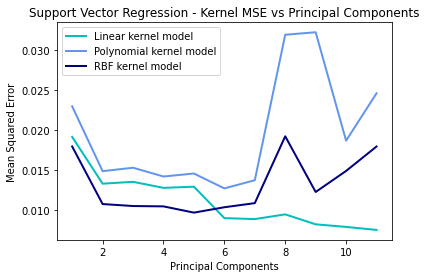

In [60]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVR
from sklearn.decomposition import PCA 
from sklearn import metrics

num_iterations = 11

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e2)
svr_poly = SVR(kernel='poly', C=1e2, degree=2)

Theta = pd.DataFrame([0.01472661, 0.04829015, 0.03102769, 0.03510738, 0.06825584, 0.08067803,
 0.05901819, 0.22666879, 0.07081431, 0.20219301, 0.11665802, 0.09533915])
Theta = Theta.transpose()
lo_rbf = 100
lo_lin = 100 
lo_poly = 100
iter_num = np.zeros(num_iterations)
rbf_arr = np.zeros(num_iterations) 
lin_arr = np.zeros(num_iterations)
poly_arr = np.zeros(num_iterations)

for n in range(num_iterations):
        
    n=n+1      # to avoid a n=0, meaning zero principal components
    print(n,'principal component(s)', end = ' ')
       
    pca = PCA(n_components=n) 
    principalComponents = pca.fit_transform(X) 
    principalDf = pd.DataFrame(data = principalComponents )                 
    finalDf = pd.concat([principalDf, pd.DataFrame(dataset['target'])], axis = 1)
    from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf,Y, test_size = 0.20, random_state=0)

    #X_test = X_test.sort_values()
    y_rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
    y_lin = svr_lin.fit(X_train,Y_train).predict(X_test)
    y_poly = svr_poly.fit(X_train,Y_train).predict(X_test)
    
    #Y_logReg_pred = (Theta.multiply(X_test))
    #Y_logReg_mse = metrics.mean_squared_error(Y_test, Y_logReg_pred)
    
    rbf_mse = metrics.mean_squared_error(Y_test, y_rbf)
    lin_mse = metrics.mean_squared_error(Y_test, y_lin)
    poly_mse = metrics.mean_squared_error(Y_test, y_poly)
        
    rbf_arr[(n-1)] = rbf_mse 
    lin_arr[(n-1)] = lin_mse
    poly_arr[(n-1)] = poly_mse
    iter_num[(n-1)] = n
        
    if rbf_mse < lo_rbf:
        lo_rbf = rbf_mse
        lo_n_rbf = n

    if lin_mse < lo_lin:
        lo_lin = lin_mse
        lo_n_lin = n
        
    if poly_mse < lo_poly:
        lo_poly = poly_mse
        lo_n_poly = n
    
    plt.figure(figsize=(20, 4))
    lw = 2
    X_data=range(len(X_test))

    plt.scatter(X_data, Y_test, color='darkorange', label='data')
    plt.plot(X_data,y_lin, color='c', lw=lw, label='Linear model')
    plt.plot(X_data,y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
    plt.plot(X_data,y_rbf, color='navy', lw=lw, label='RBF model')
    plt.xlabel('data')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
print( "   RBF Kernel gave lowest Mean-Squared-Error of", lo_rbf, "achieved at n =", lo_n_rbf)
print( "Linear Kernel gave lowest Mean-Squared-Error of", lo_lin, "achieved at n =", lo_n_lin)
print( "  Poly Kernel gave lowest Mean-Squared-Error of", lo_poly, "achieved at n =", lo_n_poly)

plt.plot(iter_num,lin_arr, color='c', lw=lw, label='Linear kernel model')
plt.plot(iter_num,poly_arr, color='cornflowerblue', lw=lw, label='Polynomial kernel model')
plt.plot(iter_num,rbf_arr, color='navy', lw=lw, label='RBF kernel model')
plt.xlabel('Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('Support Vector Regression - Kernel MSE vs Principal Components')
plt.legend()
plt.show()


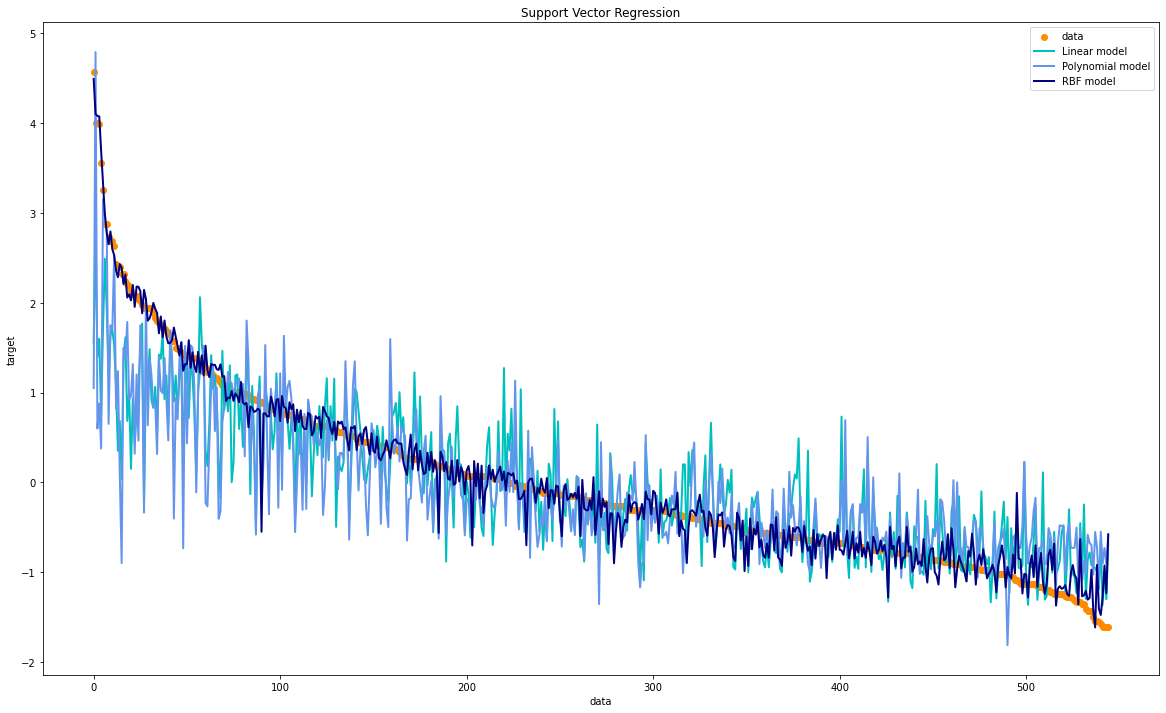

In [17]:
plt.figure(figsize=(20, 12))
lw = 2
X_data=range(len(Y))
#X=X_data
plt.scatter(X_data, Y, color='darkorange', label='data')

plt.plot(X_data,y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_data,y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.plot(X_data,y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()# THIS PLOT WAS BEFORE USING PCA